# Text Similarity and Clustering
* Analyzing Term Similarity
    1. Hamming Distance
    2. Manhattan Distance
    3. Euclidean Distance
    4. Levenshtein Edit Distance
    5. Cosine Distance and Similarity
* Analyzing Document Similarity
* Building a Movie Recommender
    1. Load and View Dataset
    2. Text Preprocessing
    3. Extract TF-IDF Features
    4. Cosine Similarity for Pairwise Document Similarity
    5. Find Top Similar Movies for a Sample Movie
    6. Build a Movie Recommender
    7. Get a List of Popular Movies
    8. Okapi BM25 Ranking for Pairwise Document Similarity
* Document Clustering
* Clustering Movies
    1. Feature Engineering
    2. K-Means Clustering
    3. Affinity Propagation
    4. Ward's Agglomerative Hierarchical Clustering

## Analyzing Term Similarity
    1. Hamming Distance
    2. Manhattan Distance
    3. Euclidean Distance
    4. Levenshtein Edit Distance
    5. Cosine Distance and Similarity

In [1]:
# character vectorization: mapping each character of term to corresponding unique number
import numpy as np

# fxn takes list of words and terms, returns corresponding character vector for words
def vectorize_terms(terms):
    terms = [term.lower() for term in terms]
    terms = [np.array(list(term)) for term in terms]
    terms = [np.array([ord(char) for char in term]) for term in terms]
    return terms

# example terms
root = 'Believe'
term1 = 'beleive'
term2 = 'bargain'
term3 = 'Elephant'

terms = [root, term1, term2, term3]
terms

['Believe', 'beleive', 'bargain', 'Elephant']

In [2]:
import pandas as pd

# perform character vectorization on strings
# view representation in dataframe

# character vectorization
term_vectors = vectorize_terms(terms)

# show vector representation
vec_df = pd.DataFrame(term_vectors, index=terms)
print(vec_df)

            0    1    2    3    4    5    6      7
Believe    98  101  108  105  101  118  101    NaN
beleive    98  101  108  101  105  118  101    NaN
bargain    98   97  114  103   97  105  110    NaN
Elephant  101  108  101  112  104   97  110  116.0


In [3]:
# store above info
root_term = root
other_terms = [term1, term2, term3]

root_term_vec = vec_df[vec_df.index == root_term].dropna(axis=1).values[0]
other_term_vecs = [vec_df[vec_df.index == term].dropna(axis=1).values[0]
                      for term in other_terms]

### Hamming Distance
* distance measured between two strings under the assumption that they are of equal length
* number of positions that have different characters or symbols between two strings of equal length

* consider two terms $u$ and $v$ of length $n$; denote hamming distance as follows:

$$hd(u,v) = \sum_{i=1}^n (u_i \neq v_i)$$

* can normalize by dividing the number of mismatches by the total length of the terms

$$norm\_hd(u,v) = \frac{\sum_{i=1}^n (u_i \neq v_i)}{n}$$

In [4]:
# function computes hamming distance between two terms and can compute normalized distance
def hamming_distance(u, v, norm=False):
    if u.shape != v.shape:
        raise ValueError('The vectors must have equal lengths.')
    return (u != v).sum() if not norm else (u != v).mean()

# measure hamming distance between root term and other terms
# compute Hamming distance
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Hamming distance between root: {} and term: {} is {}'.format(
        root_term, term, hamming_distance(root_term_vec, term_vector, norm=False)))

Hamming distance between root: Believe and term: beleive is 2
Hamming distance between root: Believe and term: bargain is 6


ValueError: The vectors must have equal lengths.

In [ ]:
# compute normalized hamming distance
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Normalized Hamming distance between root: {} and term: {} is {}'.format(
        root_term, term, round(hamming_distance(root_term_vec, term_vector, norm=True),2)))

### Manhattan Distance
* instead counting the number of mismatches, we subtract the difference between each pair of characters at each position of the two strings
* the distance between two points in a grid based on a strictly horizontal or vertical path
* mathematically denoted, where u and v are term terms of length n, as the following:

$$ md(u,v) = ||u-v||_l = \sum_{i=1}^{n} |u_i - v_i|$$

* same assumption of hamming distance: two terms have equal lengths
* can also have normalized manhattan distance

$$norm\_md(u,v) = \frac{||u-v||_l}{n} = \frac{\sum_{i=1}^{n} |u_i - v_i|}{n}$$

In [5]:
# function for calculating manhattan distance with capability of calculating normalized manhattan distance
def manhattan_distance(u, v, norm=False):
    if u.shape != v.shape:
        raise ValueError('The vectors must have equal lengths.')
    return abs(u - v).sum() if not norm else abs(u - v).mean()

# compute Manhattan distance
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Manhattan distance between root: {} and term: {} is {}'.format(
        root_term, term, manhattan_distance(root_term_vec, term_vector, norm=False)))

Manhattan distance between root: Believe and term: beleive is 8
Manhattan distance between root: Believe and term: bargain is 38


ValueError: The vectors must have equal lengths.

In [6]:
# compute normalized Manhattan distance
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Normalized Manhattan distance between root: {} and term: {} is {}'.format(
        root_term, term, round(manhattan_distance(root_term_vec, term_vector, norm=True), 2)))

Normalized Manhattan distance between root: Believe and term: beleive is 1.14
Normalized Manhattan distance between root: Believe and term: bargain is 5.43


ValueError: The vectors must have equal lengths.

### Euclidean Distance
* the shortest straight-line distance between two points
* the formula, where u and v are vectorized text terms with length n, is the following:

$$ed(u,v) = ||u-v||_2 = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}$$

In [7]:
# function helps us compute the Euclidean distance between two terms
def euclidean_distance(u,v):
    if u.shape != v.shape:
        raise ValueError('The vectors must have equal lengths.')
    distance = np.sqrt(np.sum(np.square(u-v)))
    return distance

# compute Euclidean distance
for term, term_vector in zip(other_terms, other_term_vecs):
    print('Euclidean distance between root: {} and term: {} is {}'.format(
        root_term, term, round(euclidean_distance(root_term_vec, term_vector), 2)))

Euclidean distance between root: Believe and term: beleive is 5.66
Euclidean distance between root: Believe and term: bargain is 17.94


ValueError: The vectors must have equal lengths.

### Levenshtein Edit Distance
* measure the distance between two sequences of strings based on their difference, similar to the concept behind the Hamming distance
* the minimum number of edits needed in the form of additions, deletions, or subsitutions to change or convert one term to the other
* character-based subsitutions: a single character can be edited in a single operation
* length of two terms need not be equal

In [8]:
# following pseudocode, implement levenshtein edit distance
# returns final Levenshtein Edit distance and complete edit matrix between u and v
# past terms directly in raw string not vector representations
import copy
import pandas as pd

def levenshtein_edit_distance(u, v):
    # convert to lower case
    u = u.lower()
    v = v.lower()
    # base cases
    if u == v: return 0
    elif len(u) == 0: return len(v)
    elif len(v) == 0: return len(u)
    # initialize edit distance matrix
    edit_matrix = []
    # initialize two distance matrices 
    du = [0] * (len(v) + 1)
    dv = [0] * (len(v) + 1)
    # du: the previous row of edit distances
    for i in range(len(du)):
        du[i] = i
    # dv : the current row of edit distances    
    for i in range(len(u)):
        dv[0] = i + 1
        # compute cost as per algorithm
        for j in range(len(v)):
            cost = 0 if u[i] == v[j] else 1
            dv[j + 1] = min(dv[j] + 1, du[j + 1] + 1, du[j] + cost)
        # assign dv to du for next iteration
        for j in range(len(du)):
            du[j] = dv[j]
        # copy dv to the edit matrix
        edit_matrix.append(copy.copy(dv))
    # compute the final edit distance and edit matrix    
    distance = dv[len(v)]
    edit_matrix = np.array(edit_matrix)
    edit_matrix = edit_matrix.T
    edit_matrix = edit_matrix[1:,]
    edit_matrix = pd.DataFrame(data=edit_matrix,
                               index=list(v),
                               columns=list(u))
    return distance, edit_matrix

In [9]:
# compute Levenshtein Edit distance between example terms
for term in other_terms:
    edit_d, edit_m = levenshtein_edit_distance(root_term, term)
    print('Computing distance between root: {} and term: {}'.format(root_term, term))
    print('Levenshtein edit distance is {}'.format(edit_d))
    print('The complete edit distance matrix is depicted below')
    print(edit_m)
    print('-'*30)

Computing distance between root: Believe and term: beleive
Levenshtein edit distance is 2
The complete edit distance matrix is depicted below
   b  e  l  i  e  v  e
b  0  1  2  3  4  5  6
e  1  0  1  2  3  4  5
l  2  1  0  1  2  3  4
e  3  2  1  1  1  2  3
i  4  3  2  1  2  2  3
v  5  4  3  2  2  2  3
e  6  5  4  3  2  3  2
------------------------------
Computing distance between root: Believe and term: bargain
Levenshtein edit distance is 6
The complete edit distance matrix is depicted below
   b  e  l  i  e  v  e
b  0  1  2  3  4  5  6
a  1  1  2  3  4  5  6
r  2  2  2  3  4  5  6
g  3  3  3  3  4  5  6
a  4  4  4  4  4  5  6
i  5  5  5  4  5  5  6
n  6  6  6  5  5  6  6
------------------------------
Computing distance between root: Believe and term: Elephant
Levenshtein edit distance is 7
The complete edit distance matrix is depicted below
   b  e  l  i  e  v  e
e  1  1  2  3  4  5  6
l  2  2  1  2  3  4  5
e  3  2  2  2  2  3  4
p  4  3  3  3  3  3  4
h  5  4  4  4  4  4  4
a  6 

### Cosine Distance and Similarity
* have two terms represented in vectorized forms, cosine similarity gives us the measure of the cosine of the angle between them when they're represented as non-zero positive vectors in an inner product space
* term vectors with similar orientation have scores closer to 1 (cos(0))
* term vectors with a similarity score close to 0 (cos(90)) indicate unrelated terms
* mathematical definition: let u and v be two term vectors. Then,
$$u \cdot v = ||u|| ||v|| cos(\theta)$$
* can derive cosine similarity from formula:
$$cs(u,v) = cos(\theta) = \frac{u\cdot v}{||u|| ||v||} = \frac{\sum_{i=1}^n u_i v_i}{\sqrt{\sum_{i=1}^n u_i^2}\sqrt{\sum_{i=1}^n v_i^2}}$$
* use bag of characters vectorization to build these term vectors and $n$ is the number of unique characters across the terms under analysis
* bag of characters vectorization is similar to bag of words models except here we compute frequency of each character in word
* sequence or word orders are not taken into account here

In [10]:
from scipy.stats import itemfreq

# take a list of words or terms and extract unique characters from it
# from list of unique_chars get count for each character in each word
# build bag of characters vectors
def boc_term_vectors(word_list):
    word_list = [word.lower() for word in word_list]
    unique_chars = np.unique(
                        np.hstack([list(word) 
                                   for word in word_list]))
    word_list_term_counts = [{char: count 
                                  for char, count in np.stack(
                                      np.unique(list(word), return_counts=True), axis=1)} 
                                     for word in word_list]
    boc_vectors = [np.array([int(word_term_counts.get(char, 0)) 
                             for char in unique_chars]) 
                   for word_term_counts in word_list_term_counts]
    return list(unique_chars), boc_vectors

In [11]:
# bag of character vectorization
import pandas as pd

feature_names, feature_vectors = boc_term_vectors(terms)
boc_df = pd.DataFrame(feature_vectors, columns=feature_names, index=terms)
print(boc_df)

          a  b  e  g  h  i  l  n  p  r  t  v
Believe   0  1  3  0  0  1  1  0  0  0  0  1
beleive   0  1  3  0  0  1  1  0  0  0  0  1
bargain   2  1  0  1  0  1  0  1  0  1  0  0
Elephant  1  0  2  0  1  0  1  1  1  0  1  0


In [12]:
# store these in specific variables before computing cosine distances
root_term_boc = boc_df[vec_df.index == root_term].values[0]
other_term_bocs = [boc_df[vec_df.index == term].values[0] 
                   for term in other_terms]


* if using bag of characters based character frequencies for terms or bag of words based word frequencies for documents, the score will range from 0 to 1 because frequency vectors can never be negative; angle between two vectors cannot exceed 90 degrees
* cosine distance is complementary to the similarity score and can be computed by following formula:
$$cd(u,v) = 1-cs(u,v) = 1 - cos(\theta)$$

In [13]:
# calculate cosine distance based on formula
def cosine_distance(u,v):
    distance = 1.0 - (np.dot(u,v) / (np.sqrt(sum(np.square(u))) * np.sqrt(sum(np.square(v))))
                     )
    return distance

In [14]:
# test similarity between example terms using bag of character representations
for term, boc_term in zip(other_terms, other_term_bocs):
    print('Analyzing similarity between root: {} and term: {}'.format(root_term, term))
    distance = round(cosine_distance(root_term_boc, boc_term), 2)
    similarity = round(1 - distance, 2)
    print('Cosine distance is {}'.format(distance))
    print('Cosine similarity is {}'.format(similarity))
    print('-'*40)

Analyzing similarity between root: Believe and term: beleive
Cosine distance is -0.0
Cosine similarity is 1.0
----------------------------------------
Analyzing similarity between root: Believe and term: bargain
Cosine distance is 0.82
Cosine similarity is 0.18
----------------------------------------
Analyzing similarity between root: Believe and term: Elephant
Cosine distance is 0.39
Cosine similarity is 0.61
----------------------------------------


## Building a Movie Recommender

In [15]:
# azure paths
path_to_users = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/bellepracticevm/code/Users/'
path_to_nlp = path_to_users + '/LearningCode/NLP_Learning/'

In [16]:
## Load and View Dataset
import pandas as pd

filepath = path_to_users + 'tmdb_5000_movies.csv.gz'
df = pd.read_csv(filepath, compression='gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [17]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [18]:
# combine text content from movie tagline and overview columns into a new column called description
df = df[['title', 'tagline', 'overview', 'genres', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
title          4800 non-null object
tagline        4800 non-null object
overview       4800 non-null object
genres         4800 non-null object
popularity     4800 non-null float64
description    4800 non-null object
dtypes: float64(1), object(5)
memory usage: 262.5+ KB


In [19]:
df.head()

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


In [20]:
## Text Preprocessing

# preprocessing on movie descriptions before building features
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters/whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))

len(norm_corpus)

4800

In [21]:
## Extract TF-IDF Features

# use TF-IDF to vectorize preprocessed movie descriptions and converting them into numeric vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1,2), min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix.shape

(4800, 20667)

In [22]:
## Cosine Similarity for Pairwise Document Similarity

# compute Cosine similarity scores for documents instead of terms
from sklearn.metrics.pairwise import cosine_similarity

doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
0,1.000000,0.010701,0.000000,0.019030,0.028687,0.024901,0.000000,0.026516,0.000000,0.007420,...,0.009702,0.0,0.023336,0.033549,0.000000,0.000000,0.0,0.006892,0.000000,0.000000
1,0.010701,1.000000,0.011891,0.000000,0.041623,0.000000,0.014564,0.027122,0.034688,0.007614,...,0.009956,0.0,0.004818,0.000000,0.000000,0.012593,0.0,0.022391,0.013724,0.000000
2,0.000000,0.011891,1.000000,0.000000,0.000000,0.000000,0.000000,0.022242,0.015854,0.004891,...,0.042617,0.0,0.000000,0.000000,0.016519,0.000000,0.0,0.011682,0.000000,0.004000
3,0.019030,0.000000,0.000000,1.000000,0.008793,0.000000,0.015976,0.023172,0.027452,0.073610,...,0.000000,0.0,0.009667,0.000000,0.000000,0.000000,0.0,0.028354,0.021785,0.027735
4,0.028687,0.041623,0.000000,0.008793,1.000000,0.000000,0.022912,0.028676,0.000000,0.023538,...,0.014800,0.0,0.000000,0.000000,0.000000,0.010760,0.0,0.010514,0.000000,0.000000


In [23]:
# build a list of all move titles in dataset
movies_list = df['title'].values
movies_list, movies_list.shape

(array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
        ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
        'My Date with Drew'], dtype=object), (4800,))

In [24]:
## Find Top Similar Movies for a Sample Movie

# find movie ID
movie_idx = np.where(movies_list == 'Minions')[0][0]
movie_idx

546

In [25]:
# get movie similarities
# use positional index to obtain vector of pairwise movie similarities for all movies with movie Minions
movie_similarities = doc_sim_df.iloc[movie_idx].values
movie_similarities

array([0.0104544 , 0.01072835, 0.        , ..., 0.00690954, 0.        ,
       0.        ])

In [26]:
# get top five similar movie IDs
similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
similar_movie_idxs

array([506, 614, 241, 813, 154])

In [27]:
# get top five similar movies
similar_movies = movies_list[similar_movie_idxs]
similar_movies

array(['Despicable Me 2', 'Despicable Me',
       'Teenage Mutant Ninja Turtles: Out of the Shadows', 'Superman',
       'Rise of the Guardians'], dtype=object)

In [28]:
## Build a Movie Recommender
# build movie recommender function
def movie_recommender(movie_title, movies=movies_list, doc_sims=doc_sim_df):
    # find movie id
    movie_idx = np.where(movies == movie_title)[0][0]
    # get movie similarities
    movie_similarities = doc_sims.iloc[movie_idx].values
    # get top 5 similar movie IDs
    similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
    # get top 5 movies
    similar_movies = movies[similar_movie_idxs]
    # return the top 5 movies
    return similar_movies

In [29]:
# get a list of popular movies
# sort movies dataset based on popularity score
# select some of most popular movies
# view recommendations
pop_movies = df.sort_values(by='popularity', ascending=False)
pop_movies.head()

,title,tagline,overview,genres,popularity,description
546,Minions,"Before Gru, they had a history of bad bosses","Minions Stuart, Kevin and Bob are recruited by...","[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",875.581305,"Before Gru, they had a history of bad bosses M..."
95,Interstellar,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",724.247784,Mankind was born on Earth. It was never meant ...
788,Deadpool,Witness the beginning of a happy ending,Deadpool tells the origin story of former Spec...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",514.569956,Witness the beginning of a happy ending Deadpo...
94,Guardians of the Galaxy,All heroes start somewhere.,"Light years from Earth, 26 years after being a...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",481.098624,All heroes start somewhere. Light years from E...
127,Mad Max: Fury Road,What a Lovely Day.,An apocalyptic story set in the furthest reach...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",434.278564,What a Lovely Day. An apocalyptic story set in...


In [30]:
popular_movies = ['Minions', 'Interstellar', 'Deadpool', 'Jurassic World', 
                  'Pirates of the Caribbean: The Curse of the Black Pearl', 
                  'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 
                  'Terminator Genisys', 'Captain America: Civil War', 'The Dark Knight', 
                  'The Martian', 'Batman v Superman: Dawn of Justice', 'Pulp Fiction', 
                  'The Godfather', 'The Shawshank Redemption', 
                  'The Lord of the Rings: The Fellowship of the Ring', 
                  'Harry Potter and the Chamber of Secrets', 'Star Wars', 
                  'The Hobbit: The Battle of the Five Armies', 'Iron Man']

In [31]:
# get top five recommended movies for each of these movies using movie recommender function
for movie in popular_movies:
    print('Movie:', movie)
    print('Top 5 recommended Movies:', movie_recommender(movie_title=movie))
    print()

Movie: Minions
Top 5 recommended Movies: ['Despicable Me 2' 'Despicable Me'
 'Teenage Mutant Ninja Turtles: Out of the Shadows' 'Superman'
 'Rise of the Guardians']

Movie: Interstellar
Top 5 recommended Movies: ['Gattaca' 'Space Pirate Captain Harlock' 'Space Cowboys'
 'Starship Troopers' 'Final Destination 2']

Movie: Deadpool
Top 5 recommended Movies: ['Silent Trigger' 'Underworld: Evolution' 'Bronson' 'Shaft' 'Don Jon']

Movie: Jurassic World
Top 5 recommended Movies: ['Jurassic Park' 'The Lost World: Jurassic Park' 'The Nut Job'
 "National Lampoon's Vacation" 'Vacation']

Movie: Pirates of the Caribbean: The Curse of the Black Pearl
Top 5 recommended Movies: ["Pirates of the Caribbean: Dead Man's Chest" 'The Pirate'
 'Pirates of the Caribbean: On Stranger Tides'
 'The Pirates! In an Adventure with Scientists!' 'Joyful Noise']

Movie: Dawn of the Planet of the Apes
Top 5 recommended Movies: ['Battle for the Planet of the Apes' 'Groove' 'The Other End of the Line'
 'Chicago Overcoat

In [32]:
## Okapi BM25 Ranking for Pairwise Document Similarity
"""
Data:
-----
.. data:: PARAM_K1 - Free smoothing parameter for BM25.
.. data:: PARAM_B - Free smoothing parameter for BM25.
.. data:: EPSILON - Constant used for negative idf of document in corpus.
"""

import math
from six import iteritems
from six.moves import xrange

PARAM_K1 = 2.5
PARAM_B = 0.85
EPSILON = 0.2

class BM25(object):
    """Implementation of Best Matching 25 ranking function.
    Attributes
    ----------
    corpus_size : int
        Size of corpus (number of documents).
    avgdl : float
        Average length of document in `corpus`.
    corpus : list of list of str
        Corpus of documents.
    f : list of dicts of int
        Dictionary with terms frequencies for each document in `corpus`. Words used as keys and frequencies as values.
    df : dict
        Dictionary with terms frequencies for whole `corpus`. Words used as keys and frequencies as values.
    idf : dict
        Dictionary with inversed terms frequencies for whole `corpus`. Words used as keys and frequencies as values.
    doc_len : list of int
        List of document lengths.
    """

    def __init__(self, corpus):
        """
        Parameters
        ----------
        corpus : list of list of str
            Given corpus.
        """
        self.corpus_size = len(corpus)
        self.avgdl = sum(float(len(x)) for x in corpus) / self.corpus_size
        self.corpus = corpus
        self.f = []
        self.df = {}
        self.idf = {}
        self.doc_len = []
        self.initialize()

    def initialize(self):
        """Calculates frequencies of terms in documents and in corpus. Also computes inverse document frequencies."""
        for document in self.corpus:
            frequencies = {}
            self.doc_len.append(len(document))
            for word in document:
                if word not in frequencies:
                    frequencies[word] = 0
                frequencies[word] += 1
            self.f.append(frequencies)

            for word, freq in iteritems(frequencies):
                if word not in self.df:
                    self.df[word] = 0
                self.df[word] += 1

        for word, freq in iteritems(self.df):
            self.idf[word] = math.log(self.corpus_size - freq + 0.5) - math.log(freq + 0.5)

    def get_score(self, document, index, average_idf):
        """Computes BM25 score of given `document` in relation to item of corpus selected by `index`.
        Parameters
        ----------
        document : list of str
            Document to be scored.
        index : int
            Index of document in corpus selected to score with `document`.
        average_idf : float
            Average idf in corpus.
        Returns
        -------
        float
            BM25 score.
        """
        score = 0
        for word in document:
            if word not in self.f[index]:
                continue
            idf = self.idf[word] if self.idf[word] >= 0 else EPSILON * average_idf
            score += (idf * self.f[index][word] * (PARAM_K1 + 1)
                      / (self.f[index][word] + PARAM_K1 * (1 - PARAM_B + PARAM_B * self.doc_len[index] / self.avgdl)))
        return score

    def get_scores(self, document, average_idf):
        """Computes and returns BM25 scores of given `document` in relation to
        every item in corpus.
        Parameters
        ----------
        document : list of str
            Document to be scored.
        average_idf : float
            Average idf in corpus.
        Returns
        -------
        list of float
            BM25 scores.
        """
        scores = []
        for index in xrange(self.corpus_size):
            score = self.get_score(document, index, average_idf)
            scores.append(score)
        return scores


def get_bm25_weights(corpus):
    """Returns BM25 scores (weights) of documents in corpus.
    Each document has to be weighted with every document in given corpus.
    Parameters
    ----------
    corpus : list of list of str
        Corpus of documents.
    Returns
    -------
    list of list of float
        BM25 scores.
    Examples
    --------
    >>> from gensim.summarization.bm25 import get_bm25_weights
    >>> corpus = [
    ...     ["black", "cat", "white", "cat"],
    ...     ["cat", "outer", "space"],
    ...     ["wag", "dog"]
    ... ]
    >>> result = get_bm25_weights(corpus)
    """
    bm25 = BM25(corpus)
    average_idf = sum(float(val) for val in bm25.idf.values()) / len(bm25.idf)

    weights = []
    for doc in corpus:
        scores = bm25.get_scores(doc, average_idf)
        weights.append(scores)

    return weights

In [33]:
# before using function need to tokenize corpus frist
norm_corpus_tokens = np.array([nltk.word_tokenize(doc) for doc in norm_corpus])
norm_corpus_tokens[:3]

array([list(['enter', 'world', 'pandora', '22nd', 'century', 'paraplegic', 'marine', 'dispatched', 'moon', 'pandora', 'unique', 'mission', 'becomes', 'torn', 'following', 'orders', 'protecting', 'alien', 'civilization']),
       list(['end', 'world', 'adventure', 'begins', 'captain', 'barbossa', 'long', 'believed', 'dead', 'come', 'back', 'life', 'headed', 'edge', 'earth', 'turner', 'elizabeth', 'swann', 'nothing', 'quite', 'seems']),
       list(['plan', 'one', 'escapes', 'cryptic', 'message', 'bonds', 'past', 'sends', 'trail', 'uncover', 'sinister', 'organization', 'battles', 'political', 'forces', 'keep', 'secret', 'service', 'alive', 'bond', 'peels', 'back', 'layers', 'deceit', 'reveal', 'terrible', 'truth', 'behind', 'spectre'])],
      dtype=object)

In [34]:
%%time
# use function to build pairwise document similarity matrix
wts = get_bm25_weights(norm_corpus_tokens)

CPU times: user 1min 10s, sys: 173 ms, total: 1min 10s
Wall time: 1min 10s


In [35]:
# viewing our pairwise similarity matrix
bm25_wts_df = pd.DataFrame(wts)
bm25_wts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
0,149.060647,2.529227,0.000000,3.692476,5.765205,4.715867,0.000000,4.505193,0.000000,1.750501,...,2.589865,0.0,3.310184,5.06129,0.000000,0.000000,0.0,1.619299,0.000000,0.000000
1,2.653483,119.903490,2.720199,0.000000,7.297372,0.000000,2.496650,5.774763,5.870872,1.750501,...,2.589865,0.0,1.011185,0.00000,0.000000,2.725888,0.0,4.532292,2.924023,0.000000
2,0.000000,3.229716,153.756470,0.000000,0.000000,0.000000,0.000000,4.538740,4.378262,1.399834,...,9.088009,0.0,0.000000,0.00000,3.253547,0.000000,0.0,2.803116,0.000000,1.377511
3,6.141419,0.000000,0.000000,214.277248,3.182421,0.000000,5.433209,6.839524,7.445837,18.496688,...,0.000000,0.0,2.718450,0.00000,0.000000,0.000000,0.0,8.037913,6.958000,7.156812
4,9.186831,10.791034,0.000000,2.665414,184.778486,0.000000,5.168103,7.278204,0.000000,6.643382,...,5.179731,0.0,0.000000,0.00000,0.000000,2.996697,0.0,3.238599,0.000000,0.000000


In [36]:
# use movie recommender function to get top five movie recommendations for popular movies selected earlier
for movie in popular_movies:
    print('Movie:', movie)
    print('Top 5 recommended Movies:', movie_recommender(movie_title=movie, doc_sims=bm25_wts_df))
    print()

Movie: Minions
Top 5 recommended Movies: ['Despicable Me 2' 'Despicable Me'
 'Teenage Mutant Ninja Turtles: Out of the Shadows' 'Intolerance'
 'Superman']

Movie: Interstellar
Top 5 recommended Movies: ['Space Pirate Captain Harlock' 'Prometheus' 'Starship Troopers' 'Gattaca'
 'Space Cowboys']

Movie: Deadpool
Top 5 recommended Movies: ['Underworld: Evolution' 'Shaft' 'Rabbit Hole' 'X-Men Origins: Wolverine'
 'Victor Frankenstein']

Movie: Jurassic World
Top 5 recommended Movies: ['Jurassic Park' 'The Lost World: Jurassic Park'
 "National Lampoon's Vacation" 'The Nut Job' 'Meet the Deedles']

Movie: Pirates of the Caribbean: The Curse of the Black Pearl
Top 5 recommended Movies: ['Pirates of the Caribbean: On Stranger Tides'
 "Pirates of the Caribbean: Dead Man's Chest" 'The Pirate'
 'Space Pirate Captain Harlock' 'Joyful Noise']

Movie: Dawn of the Planet of the Apes
Top 5 recommended Movies: ['Battle for the Planet of the Apes' 'Groove'
 'Conquest of the Planet of the Apes' 'The Othe

## Clustering Movies
    1. Feature Engineering
    2. K-Means Clustering
    3. Affinity Propagation
    4. Ward's Agglomerative Hierarchical Clustering

### Feature Engineering

In [39]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

stop_words = nltk.corpus.stopwords.words('english')
stop_words = stop_words + ['one', 'two', 'get']

cv = CountVectorizer(ngram_range=(1,2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(4800, 3012)

### K-Means Clustering

In [41]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 6
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
    n_clusters=6, n_init=50, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [42]:
df['kmeans_cluster'] = km.labels_

In [43]:
# viewing distribution of movies across the clusters
from collections import Counter
Counter(km.labels_)

Counter({2: 429, 1: 2832, 3: 539, 5: 238, 4: 706, 0: 56})

In [46]:
movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']].sort_values(
    by=['kmeans_cluster', 'popularity'], ascending=False).groupby('kmeans_cluster').head(20))
movie_cluster = movie_clusters.copy(deep=True)

feature_names = cv.get_feature_names()
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index]
                       for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Key Features: ['film', 'movie', 'story', 'first', 'love', 'making', 'director', 'new', 'time', 'feature', 'made', 'young', '3d', 'american', 'america']
Popular Movies: ['Contact', 'Snatch', 'The Pianist', 'Boyhood', 'Tropic Thunder', 'Movie 43', 'Night of the Living Dead', 'Almost Famous', 'My Week with Marilyn', 'Jackass 3D', 'Inside Job', 'Grindhouse', 'The Young Victoria', 'Disaster Movie', 'Jersey Boys', 'Seed of Chucky', 'Bowling for Columbine', 'Walking With Dinosaurs', 'Me and You and Everyone We Know', 'Urban Legends: Final Cut']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['young', 'man', 'story', 'love', 'family', 'find', 'must', 'time', 'back', 'friends', 'way', 'years', 'help', 'father', 'take']
Popular Movies: ['Interstellar', 'Guardians of the Galaxy', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Big Hero 6', 'Wh

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_features = cosine_similarity(cv_matrix)
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cosine_sim_features)
Counter(km.labels_)

Counter({4: 427, 3: 724, 1: 1913, 2: 504, 0: 879, 5: 353})

In [48]:
df['kmeans_cluster'] = km.labels_

In [49]:
movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']].sort_values(
    by=['kmeans_cluster', 'popularity'], ascending=False).groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

In [50]:
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Popular Movies: ['Pirates of the Caribbean: The Curse of the Black Pearl', 'Whiplash', 'The Martian', 'Frozen', 'Gone Girl', 'The Lord of the Rings: The Fellowship of the Ring', 'Pirates of the Caribbean: On Stranger Tides', 'Pulp Fiction', 'The Fifth Element', 'Quantum of Solace', 'Furious 7', 'Cinderella', 'Man of Steel', 'Gladiator', 'Aladdin', 'The Amazing Spider-Man', 'Prisoners', 'The Good, the Bad and the Ugly', 'American Sniper', 'Finding Nemo']
--------------------------------------------------------------------------------
CLUSTER #2
Popular Movies: ['Interstellar', 'Guardians of the Galaxy', 'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Big Hero 6', 'The Dark Knight', "Pirates of the Caribbean: Dead Man's Chest", 'X-Men: Apocalypse', 'Rise of the Planet of the Apes', "One Flew Over the Cuckoo's Nest", 'The Hunger Games: Mockingjay - Part 2', 'Star Wars', 'Brave', 'The Lord of the Rings: The Return of the King', 'The Hobbit: The Battle

### Affinity Propagation

In [51]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(max_iter=1000)
ap.fit(cosine_sim_features)
res = Counter(ap.labels_)
res.most_common(10)

[(183, 1355),
 (182, 93),
 (159, 80),
 (54, 74),
 (81, 57),
 (16, 51),
 (26, 47),
 (24, 45),
 (48, 43),
 (89, 42)]

In [52]:
df['affprop_cluster'] = ap.labels_
filtered_clusters = [item[0] for item in res.most_common(8)]
filtered_df = df[df['affprop_cluster'].isin(filtered_clusters)]
movie_clusters = (filtered_df[['title', 'affprop_cluster', 'popularity']].sort_values(
    by=['affprop_cluster', 'popularity'], ascending=False).groupby('affprop_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

In [53]:
# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(len(filtered_clusters)):
    movies = movie_clusters[
        movie_clusters['affprop_cluster'] == filtered_clusters[cluster_num]]['title'].values.tolist()
    print('CLUSTER #'+str(filtered_clusters[cluster_num]))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #183
Popular Movies: ['Interstellar', 'Dawn of the Planet of the Apes', 'Big Hero 6', 'The Dark Knight', "Pirates of the Caribbean: Dead Man's Chest", 'The Hunger Games: Mockingjay - Part 2', 'Star Wars', 'Brave', 'The Lord of the Rings: The Return of the King', 'The Hobbit: The Battle of the Five Armies', 'Iron Man', 'Transformers: Age of Extinction', 'Lucy', 'Mission: Impossible - Rogue Nation', 'Maze Runner: The Scorch Trials', 'Spectre', 'The Green Mile', 'Terminator 2: Judgment Day', 'Exodus: Gods and Kings', 'Harry Potter and the Goblet of Fire']
--------------------------------------------------------------------------------
CLUSTER #182
Popular Movies: ['Inception', 'Harry Potter and the Chamber of Secrets', 'The Hobbit: An Unexpected Journey', 'Django Unchained', 'American Beauty', 'Snowpiercer', 'Trainspotting', 'First Blood', 'The Bourne Supremacy', 'Yes Man', 'The Secret Life of Walter Mitty', 'RED', 'Casino', 'The Passion of the Christ', 'Annie', 'Fantasia', 'Vicky

## Ward's Agglomerative Hierarchical Clustering

In [54]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

def ward_hierarchical_clustering(feature_matrix):
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [57]:
import matplotlib.pyplot as plt

def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    movie_titles = movie_data['title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

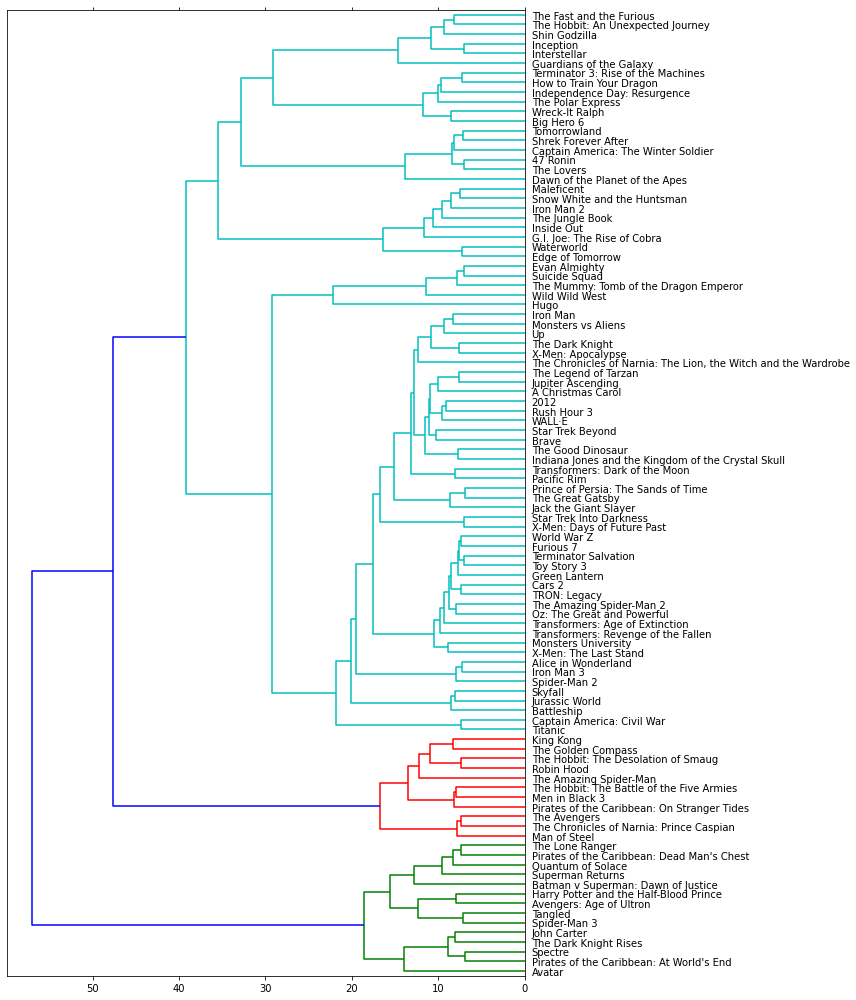

In [58]:
linkage_matrix = ward_hierarchical_clustering(cv_matrix)
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           movie_data=df,
                           figure_size=(12, 14))